In [7]:
import numpy as np
import tensorflow as tf
from keras.layers import Input, Conv3D, MaxPooling3D, UpSampling3D
from keras.models import Model
import os
import numpy as np
import pandas as pd
from pyntcloud import PyntCloud

In [8]:
directory = "abc-dataset-ply/"
files = sorted([filename for filename in os.listdir(directory) if os.path.isfile(os.path.join(directory, filename))])
dataset = []

def convert_to_binvox(path):
    point_cloud = np.loadtxt(path, skiprows=12)[:, 0:3]
    df = pd.DataFrame(data=point_cloud, columns=['x','y','z'])
    cloud = PyntCloud(df)
    voxelgrid_id = cloud.add_structure("voxelgrid", n_x=64, n_y=64, n_z=64)
    voxelgrid = cloud.structures[voxelgrid_id]
    Binary_voxel_array = voxelgrid.get_feature_vector(mode="binary")
    dataset.append(Binary_voxel_array)

for i in files:
    path = os.path.join(directory, i)
    convert_to_binvox(path)

In [9]:
# Load your dataset into numpy arrays
dataset = np.array(dataset)

# Split your dataset into train and test datasets
train_dataset = dataset[:100]  # Adjust the number as needed
test_dataset = dataset[100:]   # The remaining data for testing

# Define the input shape
input_shape = (64, 64, 64, 1)

In [10]:
input_data = Input(shape=input_shape)
x = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(input_data)
x = MaxPooling3D((2, 2, 2), padding='same')(x)
x = Conv3D(16, (3, 3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling3D((2, 2, 2), padding='same')(x)

In [11]:
x = Conv3D(16, (3, 3, 3), activation='relu', padding='same')(encoded)
x = UpSampling3D((2, 2, 2))(x)
x = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(x)
x = UpSampling3D((2, 2, 2))(x)
decoded = Conv3D(1, (3, 3, 3), activation='sigmoid', padding='same')(x)

In [12]:
autoencoder = Model(input_data, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(train_dataset, train_dataset, epochs=20, batch_size=10, validation_data=(test_dataset, test_dataset))
reconstructed_data = autoencoder.predict(test_dataset)

Epoch 1/20
10/10 [==============================] - 9s 349ms/step - loss: 0.5304 - val_loss: 0.3497
Epoch 2/20
10/10 [==============================] - 3s 286ms/step - loss: 0.2257 - val_loss: 0.0901
Epoch 3/20
10/10 [==============================] - 3s 285ms/step - loss: 0.0714 - val_loss: 0.0550
Epoch 4/20
10/10 [==============================] - 3s 286ms/step - loss: 0.0579 - val_loss: 0.0549
Epoch 5/20
10/10 [==============================] - 3s 285ms/step - loss: 0.0537 - val_loss: 0.0481
Epoch 6/20
10/10 [==============================] - 3s 286ms/step - loss: 0.0509 - val_loss: 0.0473
Epoch 7/20
10/10 [==============================] - 3s 285ms/step - loss: 0.0489 - val_loss: 0.0455
Epoch 8/20
10/10 [==============================] - 3s 284ms/step - loss: 0.0475 - val_loss: 0.0441
Epoch 9/20
10/10 [==============================] - 3s 284ms/step - loss: 0.0462 - val_loss: 0.0431
Epoch 10/20
10/10 [==============================] - 3s 285ms/step - loss: 0.0453 - val_loss: 0.0425

In [22]:
import matplotlib.pyplot as plt

index = 0

original_sample = test_dataset[index]

reconstructed_sample = reconstructed_data[index].reshape(64, 64, 64)
threshold = 0.5  # Adjust the threshold as needed
reconstructed_sample = (reconstructed_sample > threshold).astype(int)


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

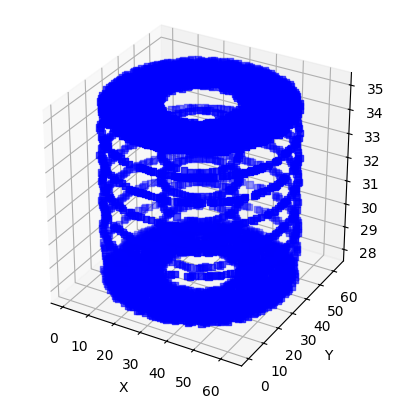

In [25]:
voxel_data = original_sample

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a mesh grid for 3D plotting
x, y, z = np.indices(voxel_data.shape)

# Extract the coordinates where voxel_data is equal to 1
x1, y1, z1 = x[voxel_data == 1], y[voxel_data == 1], z[voxel_data == 1]

# Plot the voxels as points or cubes
ax.scatter(x1, y1, z1, c='b', marker='s')  # Use 'marker='s'' for cubes

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set the aspect ratio to be equal to avoid distorted visualization
ax.set_box_aspect([1, 1, 1])

# Show the plot
plt.show()

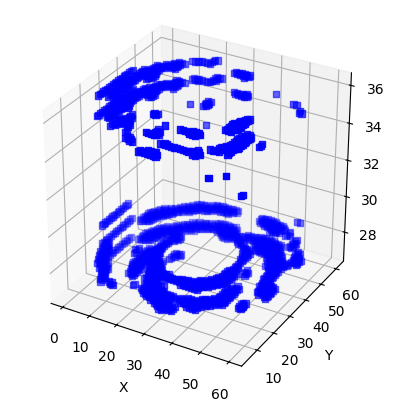

In [24]:
voxel_data = reconstructed_sample

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a mesh grid for 3D plotting
x, y, z = np.indices(voxel_data.shape)

# Extract the coordinates where voxel_data is equal to 1
x1, y1, z1 = x[voxel_data == 1], y[voxel_data == 1], z[voxel_data == 1]

# Plot the voxels as points or cubes
ax.scatter(x1, y1, z1, c='b', marker='s')  # Use 'marker='s'' for cubes

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set the aspect ratio to be equal to avoid distorted visualization
ax.set_box_aspect([1, 1, 1])

# Show the plot
plt.show()